loading all relevant libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

loading datasets

In [2]:
df_wages = pd.read_csv("EPI Data Library - Wages by education.csv") #dataset that includes annual median wages ($/hr) for different groups of individuals in the US (organized by education level, gender, and race) 
df_unemployment  = pd.read_csv("EPI Data Library - Unemployment.csv") #dataset that includes monthly unemployment (%) for different groups of individuals in the US (organized by education level, gender, and race)   

## How Education Level, Gender, and Race Play a Role in Median Wages Overtime (1979-2019)

Converting columns in data frame into lists.

Lists were created that contain annual median wages for individuals of different genders, race, and education level.
Data was pulled out using the column name, which specifies those variables. For each list of annual median wage values, the dollar sign ($) was removed and entries were converted into floats for plotting.

In [642]:
f=41 #represents number of years going back in time (starts at 2019)
date_temp = df_wages['Date'].to_list()
date = date_temp[0:f]

In [643]:
white_men_some_college = df_wages['White Men Some college'].to_list()
white_men_some_college_final = np.array([entry.strip('$') for entry in white_men_some_college[0:f]],dtype=np.float32).tolist()
white_women_some_college = df_wages['White Women Some college'].to_list()
white_women_some_college_final = np.array([entry.strip('$') for entry in white_women_some_college[0:f]],dtype=np.float32).tolist()
black_men_some_college = df_wages['Black Men Some college'].to_list()
black_men_some_college_final = np.array([entry.strip('$') for entry in black_men_some_college[0:f]],dtype=np.float32).tolist()
black_women_some_college = df_wages['Black Women Some college'].to_list()
black_women_some_college_final = np.array([entry.strip('$') for entry in black_women_some_college[0:f]],dtype=np.float32).tolist()
hispanic_men_some_college = df_wages['Hispanic Men Some college'].to_list()
hispanic_men_some_college_final = np.array([entry.strip('$') for entry in hispanic_men_some_college[0:f]],dtype=np.float32).tolist()
hispanic_women_some_college = df_wages['Hispanic Women Some college'].to_list()
hispanic_women_some_college_final = np.array([entry.strip('$') for entry in hispanic_women_some_college[0:f]],dtype=np.float32).tolist()

In [644]:
white_men_bachelors_degree = df_wages['White Men Bachelor degree'].to_list()
white_men_bachelors_degree_final = np.array([entry.strip('$') for entry in white_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
white_women_bachelors_degree = df_wages['White Women Bachelor degree'].to_list()
white_women_bachelors_degree_final = np.array([entry.strip('$') for entry in white_women_bachelors_degree[0:f]],dtype=np.float32).tolist()
black_men_bachelors_degree = df_wages['Black Men Bachelor degree'].to_list()
black_men_bachelors_degree_final = np.array([entry.strip('$') for entry in black_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
black_women_bachelors_degree = df_wages['Black Women Bachelor degree'].to_list()
black_women_bachelors_degree_final = np.array([entry.strip('$') for entry in black_women_bachelors_degree[0:f]],dtype=np.float32).tolist()
hispanic_men_bachelors_degree = df_wages['Hispanic Men Bachelor degree'].to_list()
hispanic_men_bachelors_degree_final = np.array([entry.strip('$') for entry in hispanic_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
hispanic_women_bachelors_degree = df_wages['Hispanic Women Bachelor degree'].to_list()
hispanic_women_bachelors_degree_final = np.array([entry.strip('$') for entry in hispanic_women_bachelors_degree[0:f]],dtype=np.float32).tolist()

In [645]:
white_men_advanced_degree = df_wages['White Men Advanced degree'].to_list()
white_men_advanced_degree_final = np.array([entry.strip('$') for entry in white_men_advanced_degree[0:f]],dtype=np.float32).tolist()
white_women_advanced_degree = df_wages['White Women Advanced degree'].to_list()
white_women_advanced_degree_final = np.array([entry.strip('$') for entry in white_women_advanced_degree[0:f]],dtype=np.float32).tolist()
black_men_advanced_degree = df_wages['Black Men Advanced degree'].to_list()
black_men_advanced_degree_final = np.array([entry.strip('$') for entry in black_men_advanced_degree[0:f]],dtype=np.float32).tolist()
black_women_advanced_degree = df_wages['Black Women Advanced degree'].to_list()
black_women_advanced_degree_final = np.array([entry.strip('$') for entry in black_women_advanced_degree[0:f]],dtype=np.float32).tolist()
hispanic_men_advanced_degree = df_wages['Hispanic Men Advanced degree'].to_list()
hispanic_men_advanced_degree_final = np.array([entry.strip('$') for entry in hispanic_men_advanced_degree[0:f]],dtype=np.float32).tolist()
hispanic_women_advanced_degree = df_wages['Hispanic Women Advanced degree'].to_list()
hispanic_women_advanced_degree_final = np.array([entry.strip('$') for entry in hispanic_women_advanced_degree[0:f]],dtype=np.float32).tolist()

Plotting - Effect of Race on Median Wage Overtime, 1979-2019 (Education Level Constant - Some College; Gender Constant)

(same approach to plotting as above)

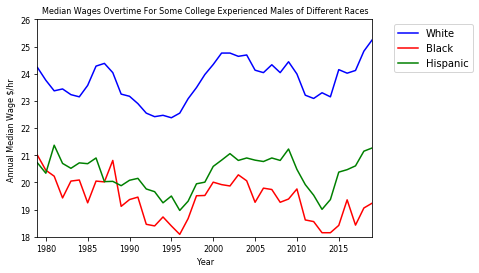

In [646]:
plt.plot(date, white_men_some_college_final, '-b', label='White') #plots list of dates on x-axis and annual median wages for White males with some college experience on y-axis
plt.plot(date, black_men_some_college_final, '-r', label='Black') #plots list of dates on x-axis and annual median wages for Black males with some college experience on y-axis
plt.plot(date, hispanic_men_some_college_final, '-g', label='Hispanic') #plots list of dates on x-axis and annual median wages for Hispanic males with some college experience on y-axis
plt.xlim(1979,2019) #specifies min and max values on x-axis
plt.ylim(18,26) #specifies min and max values on y-axis
plt.title('Median Wages Overtime For Some College Experienced Males of Different Races', size=8) #titles figure and specifies font size
plt.ylabel('Annual Median Wage $/hr ', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size
plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

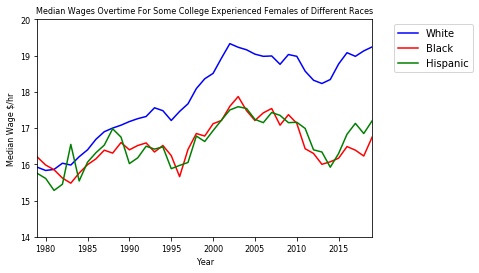

In [647]:
plt.plot(date, white_women_some_college_final, '-b', label='White') #plots list of dates on x-axis and annual median wages for White females with some college experience on y-axis
plt.plot(date, black_women_some_college_final, '-r', label='Black') #plots list of dates on x-axis and annual median wages for Black females with some college experience on y-axis
plt.plot(date, hispanic_women_some_college_final, '-g', label='Hispanic') #plots list of dates on x-axis and annual median wages for Hispanic females with some college experience on y-axis
plt.xlim(1979,2019) #specifies min and max values on x-axis
plt.ylim(14,20) #specifies min and max values on y-axis
plt.title('Median Wages Overtime For Some College Experienced Females of Different Races', size=8) #titles figure and specifies font size
plt.ylabel('Median Wage $/hr', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size
plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Plotting - Effect of Gender on Median Wage Overtime, 1979-2019 (Education Level Constant - Some College; Race Constant)

(same approach to plotting as above)

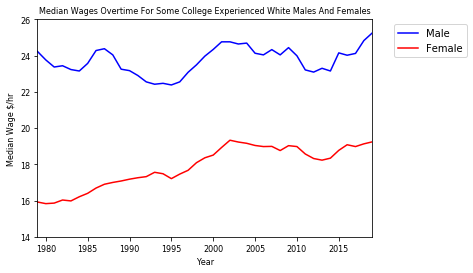

In [648]:
plt.plot(date, white_men_some_college_final, '-b', label='Male')
plt.plot(date, white_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(14,26)
plt.title('Median Wages Overtime For Some College Experienced White Males And Females', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

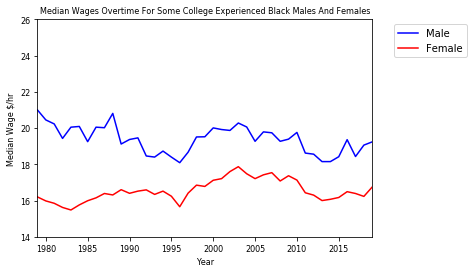

In [649]:
plt.plot(date, black_men_some_college_final, '-b', label='Male')
plt.plot(date, black_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(14,26)
plt.title('Median Wages Overtime For Some College Experienced Black Males And Females', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

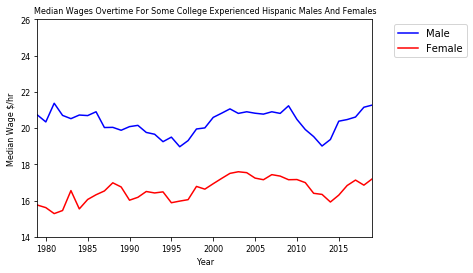

In [650]:
plt.plot(date, hispanic_men_some_college_final, '-b', label='Male')
plt.plot(date, hispanic_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(14,26)
plt.title('Median Wages Overtime For Some College Experienced Hispanic Males And Females', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Race on Median Wage Overtime, 1979-2019 (Education Level Constant - Bachelor's Degree; Gender Constant)

(same approach to plotting as above)

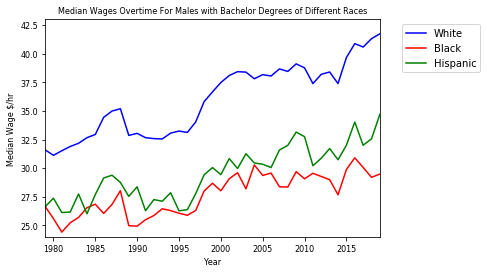

In [651]:
plt.plot(date, white_men_bachelors_degree_final, '-b', label='White')
plt.plot(date, black_men_bachelors_degree_final, '-r', label='Black')
plt.plot(date, hispanic_men_bachelors_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(24,43)
plt.title('Median Wages Overtime For Males with Bachelor Degrees of Different Races', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

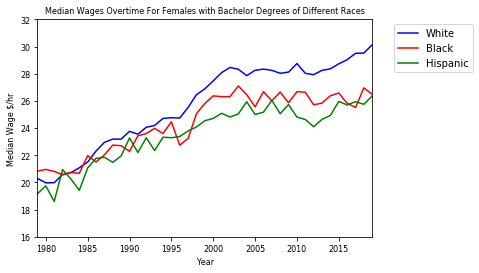

In [652]:
plt.plot(date, white_women_bachelors_degree_final, '-b', label='White')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Black')
plt.plot(date, hispanic_women_bachelors_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(16,32)
plt.title('Median Wages Overtime For Females with Bachelor Degrees of Different Races', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Gender on Median Wage Overtime, 1979-2019 (Education Level Constant - Bachelor's Degree; Race Constant)

(same approach to plotting as above)

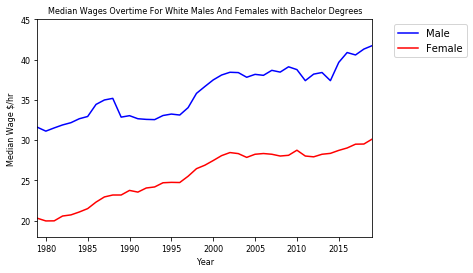

In [653]:
plt.plot(date, white_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, white_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(18,45)
plt.title('Median Wages Overtime For White Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

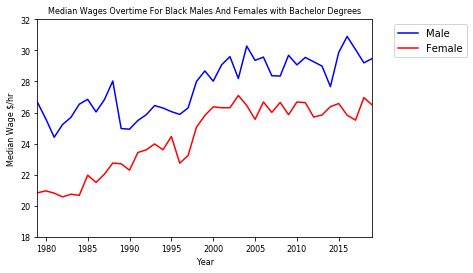

In [654]:
plt.plot(date, black_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(18,32)
plt.title('Median Wages Overtime For Black Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

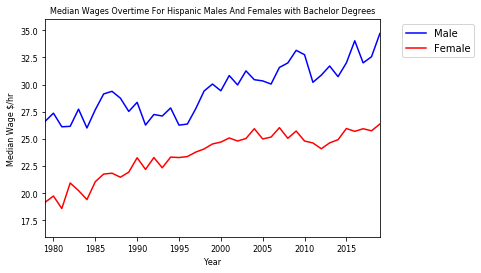

In [655]:
plt.plot(date, hispanic_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, hispanic_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(16,36)
plt.title('Median Wages Overtime For Hispanic Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Race on Median Wage Overtime, 1979-2019 (Education Level Constant - Advanced Degree; Gender Constant)

(same approach to plotting as above)

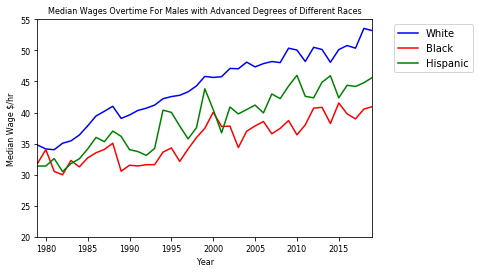

In [656]:
plt.plot(date, white_men_advanced_degree_final, '-b', label='White')
plt.plot(date, black_men_advanced_degree_final, '-r', label='Black')
plt.plot(date, hispanic_men_advanced_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(20,55)
plt.title('Median Wages Overtime For Males with Advanced Degrees of Different Races', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

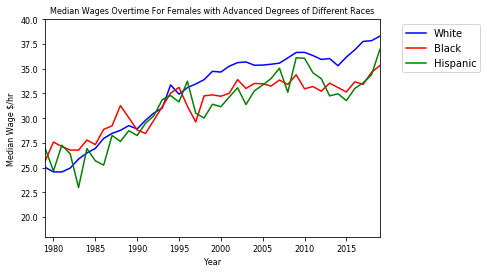

In [657]:
plt.plot(date, white_women_advanced_degree_final, '-b', label='White')
plt.plot(date, black_women_advanced_degree_final, '-r', label='Black')
plt.plot(date, hispanic_women_advanced_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(18,40)
plt.title('Median Wages Overtime For Females with Advanced Degrees of Different Races', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Gender on Median Wage Overtime, 1979-2019 (Education Level Constant - Advanced Degree; Race Constant)

(same approach to plotting as above)

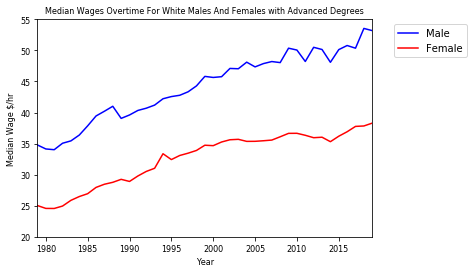

In [658]:
plt.plot(date, white_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, white_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(20,55)
plt.title('Median Wages Overtime For White Males And Females with Advanced Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

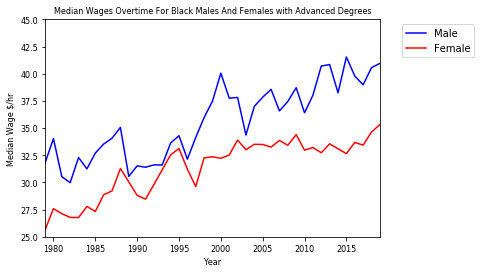

In [659]:
plt.plot(date, black_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, black_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(25,45)
plt.title('Median Wages Overtime For Black Males And Females with Advanced Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

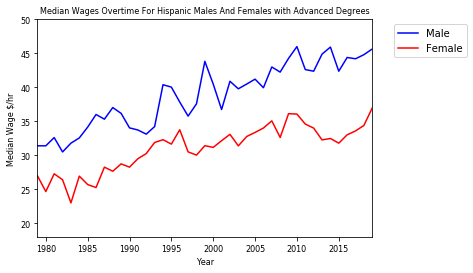

In [660]:
plt.plot(date, hispanic_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, hispanic_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(18,50)
plt.title('Median Wages Overtime For Hispanic Males And Females with Advanced Degrees', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Predictive Modelling

Using a linear regression, the relationship between time and annual median wage for individuals with advanced degrees, same race, but of different genders was modelled. This type of relationship was modelled specifically because the data overall seemed relatively smooth and followed relatively linear trends. Although adding a predictor (year) or using a time series regression (ARIMA) would have portrayed the relationship more accurately, given the scope of the class, a linear regression model was chosen. Before the linear regression model was applied, the data was split, so 80% of it was trained and 20% was tested, in order to better evaluate the success of the model. 

In [661]:
date_float = []
for entry in date: 
    entry = float(entry) #converting each entry in list of dates from integers to floats
    date_float.append(entry)

In [662]:
#converting lists into arrays and reshaping them
date_array = np.asarray(date_float)
date_array=date_array.reshape(-1,1)

white_men_advanced_degree_final_array=np.asarray(white_men_advanced_degree_final)
white_men_advanced_degree_final_array = white_men_advanced_degree_final_array.reshape(-1,1)

white_women_advanced_degree_final_array=np.asarray(white_women_advanced_degree_final)
white_women_advanced_degree_final_array = white_women_advanced_degree_final_array.reshape(-1,1)

black_men_advanced_degree_final_array=np.asarray(black_men_advanced_degree_final)
black_men_advanced_degree_final_array = black_men_advanced_degree_final_array.reshape(-1,1)

black_women_advanced_degree_final_array=np.asarray(black_women_advanced_degree_final)
black_women_advanced_degree_final_array = black_women_advanced_degree_final_array.reshape(-1,1)

hispanic_men_advanced_degree_final_array=np.asarray(hispanic_men_advanced_degree_final)
hispanic_men_advanced_degree_final_array = hispanic_men_advanced_degree_final_array.reshape(-1,1)

hispanic_women_advanced_degree_final_array=np.asarray(hispanic_women_advanced_degree_final)
hispanic_women_advanced_degree_final_array = hispanic_women_advanced_degree_final_array.reshape(-1,1)

In [663]:
#training/testing data (80% of data in training and 20% of the data in testing)
#random state value was randomly chosen, but kept consistent

x_train1, x_test1, y_train1, y_test1 = train_test_split(date_array, white_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train2, x_test2, y_train2, y_test2 = train_test_split(date_array, white_women_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train3, x_test3, y_train3, y_test3 = train_test_split(date_array, black_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train4, x_test4, y_train4, y_test4 = train_test_split(date_array, black_women_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train5, x_test5, y_train5, y_test5 = train_test_split(date_array, hispanic_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train6, x_test6, y_train6, y_test6 = train_test_split(date_array, hispanic_women_advanced_degree_final_array, test_size=0.2, random_state=44)

In [664]:
#Linear regression, training model using the training sets
white_men_advanced_degree_final_reg = LinearRegression().fit(x_train1,y_train1)
white_women_advanced_degree_final_reg = LinearRegression().fit(x_train2,y_train2)
black_men_advanced_degree_final_reg = LinearRegression().fit(x_train3,y_train3)
black_women_advanced_degree_final_reg = LinearRegression().fit(x_train4,y_train4)
hispanic_men_advanced_degree_final_reg = LinearRegression().fit(x_train5,y_train5)
hispanic_women_advanced_degree_final_reg = LinearRegression().fit(x_train6,y_train6)

In [665]:
#Predicting model using testing set
y_pred1 = white_men_advanced_degree_final_reg.predict(x_test1)
y_pred2 = white_women_advanced_degree_final_reg.predict(x_test2)
y_pred3 = black_men_advanced_degree_final_reg.predict(x_test3)
y_pred4 = black_women_advanced_degree_final_reg.predict(x_test4)
y_pred5 = hispanic_men_advanced_degree_final_reg.predict(x_test5)
y_pred6 = hispanic_women_advanced_degree_final_reg.predict(x_test6)

Slope: 
 [[0.46191617]]
Y-intercept: 
 [-879.21100098]
Coefficient of determination: 0.91
Slope: 
 [[0.33729335]]
Y-intercept: 
 [-641.67929654]
Coefficient of determination: 0.87


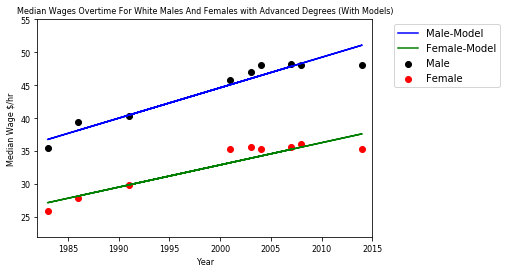

In [666]:
#White Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#White Male with Advanced Degree
print('Slope: \n', white_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', white_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_pred1)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#White Female with Advanced Degree
print('Slope: \n', white_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', white_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test2, y_pred2)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test1, y_test1,  color='black',label='Male') #plots raw data
plt.plot(x_test1, y_pred1, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test2, y_test2,  color='red',label='Female') #plots raw data
plt.plot(x_test2, y_pred2, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(22,55) #specifies min and max values on y-axis

plt.title('Median Wages Overtime For White Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Median Wage $/hr', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Slope: 
 [[0.26328552]]
Y-intercept: 
 [-490.53463164]
Coefficient of determination: 0.62
Slope: 
 [[0.18755204]]
Y-intercept: 
 [-343.53292865]
Coefficient of determination: 0.83


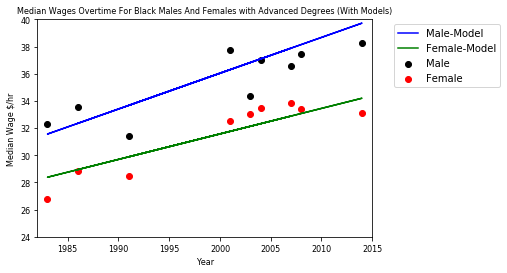

In [667]:
#Black Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#Black Male with Advanced Degree
print('Slope: \n', black_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', black_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test3, y_pred3)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#Black Female with Advanced Degree
print('Slope: \n', black_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', black_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test4, y_pred4)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test3, y_test3,  color='black',label='Male') #plots raw data
plt.plot(x_test3, y_pred3, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test4, y_test4,  color='red',label='Female') #plots raw data
plt.plot(x_test4, y_pred4, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(24,40) #specifies min and max values on y-axis

plt.title('Median Wages Overtime For Black Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Median Wage $/hr', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Slope: 
 [[0.35943006]]
Y-intercept: 
 [-679.6267258]
Coefficient of determination: 0.87
Slope: 
 [[0.22950102]]
Y-intercept: 
 [-427.57637643]
Coefficient of determination: 0.68


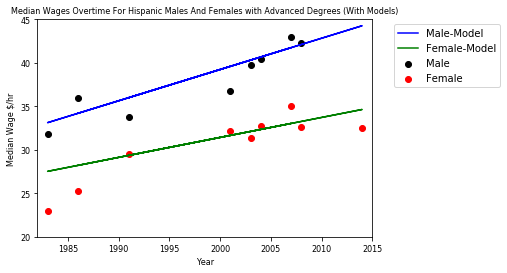

In [668]:
#Hispanic Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#Hispanic Male with Advanced Degree
print('Slope: \n', hispanic_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', hispanic_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test5, y_pred5)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#Hispanic Female with Advanced Degree
print('Slope: \n', hispanic_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', hispanic_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test6, y_pred6)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test5, y_test5,  color='black',label='Male') #plots raw data
plt.plot(x_test5, y_pred5, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test6, y_test6,  color='red',label='Female') #plots raw data
plt.plot(x_test6, y_pred6, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(20,45) #specifies min and max values on y-axis

plt.title('Median Wages Overtime For Hispanic Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Median Wage $/hr', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Plotting - Effect of Education Level on Median Wage Overtime, 1979-2019 (Race Constant; Gender Constant) 

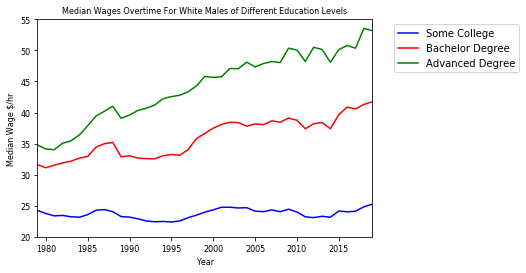

In [669]:
plt.plot(date, white_men_some_college_final, '-b', label='Some College')
plt.plot(date, white_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, white_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(20,55)
plt.title('Median Wages Overtime For White Males of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

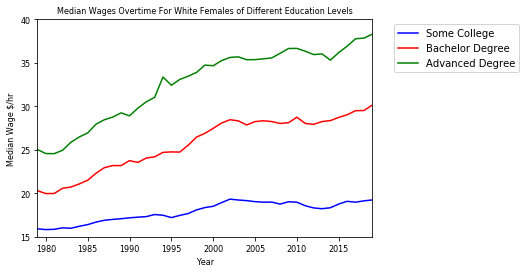

In [670]:
plt.plot(date, white_women_some_college_final, '-b', label='Some College')
plt.plot(date, white_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, white_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(15,40)
plt.title('Median Wages Overtime For White Females of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

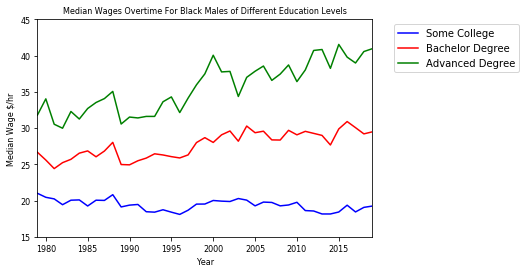

In [671]:
plt.plot(date, black_men_some_college_final, '-b', label='Some College')
plt.plot(date, black_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, black_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(15,45)
plt.title('Median Wages Overtime For Black Males of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

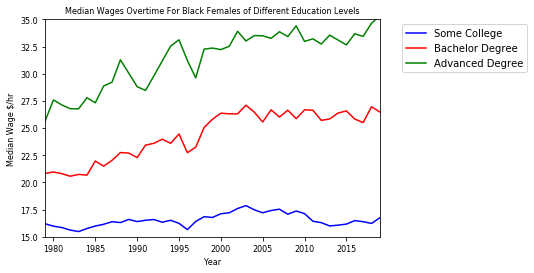

In [672]:
plt.plot(date, black_women_some_college_final, '-b', label='Some College')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, black_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(15,35)
plt.title('Median Wages Overtime For Black Females of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

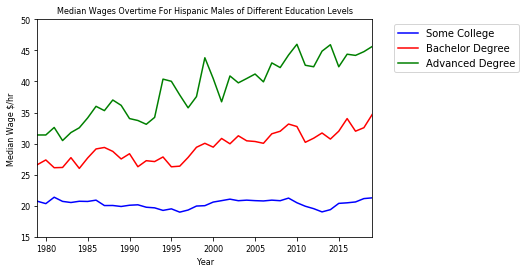

In [673]:
plt.plot(date, hispanic_men_some_college_final, '-b', label='Some College')
plt.plot(date, hispanic_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, hispanic_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(15,50)
plt.title('Median Wages Overtime For Hispanic Males of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

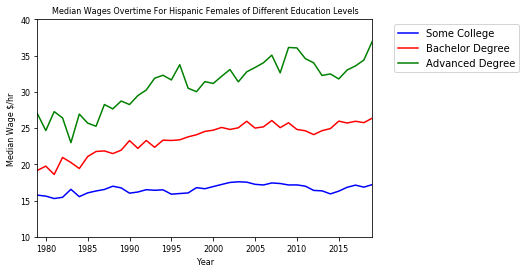

In [674]:
plt.plot(date, hispanic_women_some_college_final, '-b', label='Some College')
plt.plot(date, hispanic_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, hispanic_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(10,40)
plt.title('Median Wages Overtime For Hispanic Females of Different Education Levels', size=8)
plt.ylabel('Median Wage $/hr', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## How Education Level, Gender, and Race Play a Role in Unemployment Rate Overtime (1979-2019)

Data was loaded and cleaned up

In [675]:
df_unemployment  = pd.read_csv("EPI Data Library - Unemployment.csv") 

In [676]:
df_unemployment = df_unemployment.iloc[13:] #in order for time frame to match the time frame of the data in the previous section, data from the 13th row and onwards was taken

In [677]:
df_unemployment = df_unemployment.head(-12) #the last 12 rows were removed to match the time frame of the data in the previous section (some of the values were NaN, so they needed to be removed as well)

In [678]:
df_unemployment

,Date,All,16-24,25-54,55-64,65,Less than HS,High school,Some college,Bachelor degree,...,White Men,White Men 16-24,White Men 25-54,White Men 55-64,White Men 65+,White Men Less than HS,White Men High school,White Men Some college,White Men Bachelor degree,White Men Advanced degree
13,Dec-2019,3.7%,8.4%,3.1%,2.6%,3.0%,7.7%,4.7%,3.5%,2.5%,...,3.1%,8.0%,2.6%,2.2%,2.6%,8.5%,4.0%,2.8%,2.2%,1.7%
14,Nov-2019,3.7%,8.4%,3.1%,2.6%,3.0%,7.8%,4.7%,3.5%,2.5%,...,3.2%,7.9%,2.6%,2.3%,2.5%,8.5%,4.0%,2.9%,2.2%,1.8%
15,Oct-2019,3.7%,8.5%,3.1%,2.7%,3.0%,7.8%,4.6%,3.5%,2.5%,...,3.2%,7.8%,2.6%,2.4%,2.5%,8.5%,4.0%,2.9%,2.2%,1.8%
16,Sep-2019,3.7%,8.5%,3.1%,2.7%,3.0%,7.8%,4.6%,3.6%,2.5%,...,3.1%,7.8%,2.6%,2.3%,2.6%,8.4%,3.9%,2.9%,2.3%,1.8%
17,Aug-2019,3.7%,8.5%,3.1%,2.7%,3.1%,7.9%,4.7%,3.6%,2.5%,...,3.1%,7.7%,2.6%,2.3%,2.6%,8.4%,3.9%,2.9%,2.3%,1.8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,May-1979,5.9%,11.9%,4.2%,2.8%,3.7%,9.9%,5.3%,4.9%,2.9%,...,4.2%,9.4%,2.8%,2.3%,3.4%,7.6%,3.8%,3.6%,2.0%,1.3%
501,Apr-1979,5.9%,11.9%,4.2%,2.8%,3.7%,9.9%,5.4%,4.9%,3.0%,...,4.2%,9.4%,2.8%,2.3%,3.5%,7.5%,3.8%,3.6%,2.0%,1.3%
502,Mar-1979,6.0%,12.0%,4.3%,2.8%,3.8%,9.9%,5.4%,4.9%,3.0%,...,4.2%,9.4%,2.8%,2.4%,3.5%,7.5%,3.8%,3.6%,2.1%,1.3%
503,Feb-1979,6.0%,12.2%,4.3%,2.8%,3.8%,9.9%,5.4%,5.0%,3.0%,...,4.3%,9.6%,2.8%,2.4%,3.5%,7.6%,3.9%,3.6%,2.1%,1.4%


In [679]:
f=493 #represents number of months going back in time (starts at Dec. 2019 after cleaning up the data)
date_temp2 = df_unemployment['Date'].to_list()
date2 = date_temp[0:f]

Lists were created that contain monthly unemployment rate for individuals of different genders, race, and education level. Data was pulled out using the column name, which specifies those variables. For each list of monthly unemployment rate values, the percentage sign (%) was removed and entries were converted into floats for plotting. In addition, using the statistics library, the average of 12 values was taken to represent the annual average unemployment rate, as data was provided monthly. This was done for consistency with the data utilized in the previous section.

In [680]:
white_men_some_college = df_unemployment['White Men Some college'].to_list()
white_men_some_college_final = np.array([entry.strip('%') for entry in white_men_some_college[0:f]],dtype=np.float32).tolist()
white_women_some_college = df_unemployment['White Women Some college'].to_list()
white_women_some_college_final = np.array([entry.strip('%') for entry in white_women_some_college[0:f]],dtype=np.float32).tolist()
black_men_some_college = df_unemployment['Black Men Some college'].to_list()
black_men_some_college_final = np.array([entry.strip('%') for entry in black_men_some_college[0:f]],dtype=np.float32).tolist()
black_women_some_college = df_unemployment['Black Women Some college'].to_list()
black_women_some_college_final = np.array([entry.strip('%') for entry in black_women_some_college[0:f]],dtype=np.float32).tolist()
hispanic_men_some_college = df_unemployment['Hispanic Men Some college'].to_list()
hispanic_men_some_college_final = np.array([entry.strip('%') for entry in hispanic_men_some_college[0:f]],dtype=np.float32).tolist()
hispanic_women_some_college = df_unemployment['Hispanic Women Some college'].to_list()
hispanic_women_some_college_final = np.array([entry.strip('%') for entry in hispanic_women_some_college[0:f]],dtype=np.float32).tolist()

In [681]:
white_men_some_college_final= [statistics.mean(white_men_some_college_final[i:i + 12]) for i in range(0, len(white_men_some_college_final), 12)]
white_women_some_college_final = [statistics.mean(white_women_some_college_final[i:i + 12]) for i in range(0, len(white_women_some_college_final), 12)]
black_men_some_college_final = [statistics.mean(black_men_some_college_final[i:i + 12]) for i in range(0, len(black_men_some_college_final), 12)]
black_women_some_college_final = [statistics.mean(black_women_some_college_final[i:i + 12]) for i in range(0, len(black_women_some_college_final), 12)]
hispanic_men_some_college_final = [statistics.mean(hispanic_men_some_college_final[i:i + 12]) for i in range(0, len(hispanic_men_some_college_final), 12)]
hispanic_women_some_college_final = [statistics.mean(hispanic_women_some_college_final[i:i + 12]) for i in range(0, len(hispanic_women_some_college_final), 12)]

In [682]:
white_men_bachelors_degree = df_unemployment['White Men Bachelor degree'].to_list()
white_men_bachelors_degree_final = np.array([entry.strip('%') for entry in white_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
white_women_bachelors_degree = df_unemployment['White Women Bachelor degree'].to_list()
white_women_bachelors_degree_final = np.array([entry.strip('%') for entry in white_women_bachelors_degree[0:f]],dtype=np.float32).tolist()
black_men_bachelors_degree = df_unemployment['Black Men Bachelor degree'].to_list()
black_men_bachelors_degree_final = np.array([entry.strip('%') for entry in black_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
black_women_bachelors_degree = df_unemployment['Black Women Bachelor degree'].to_list()
black_women_bachelors_degree_final = np.array([entry.strip('%') for entry in black_women_bachelors_degree[0:f]],dtype=np.float32).tolist()
hispanic_men_bachelors_degree = df_unemployment['Hispanic Men Bachelor degree'].to_list()
hispanic_men_bachelors_degree_final = np.array([entry.strip('%') for entry in hispanic_men_bachelors_degree[0:f]],dtype=np.float32).tolist()
hispanic_women_bachelors_degree = df_unemployment['Hispanic Women Bachelor degree'].to_list()
hispanic_women_bachelors_degree_final = np.array([entry.strip('%') for entry in hispanic_women_bachelors_degree[0:f]],dtype=np.float32).tolist()

In [683]:
white_men_bachelors_degree_final= [statistics.mean(white_men_bachelors_degree_final[i:i + 12]) for i in range(0, len(white_men_bachelors_degree_final), 12)]
white_women_bachelors_degree_final = [statistics.mean(white_women_bachelors_degree_final[i:i + 12]) for i in range(0, len(white_women_bachelors_degree_final), 12)]
black_men_bachelors_degree_final = [statistics.mean(black_men_bachelors_degree_final[i:i + 12]) for i in range(0, len(black_men_bachelors_degree_final), 12)]
black_women_bachelors_degree_final = [statistics.mean(black_women_bachelors_degree_final[i:i + 12]) for i in range(0, len(black_women_bachelors_degree_final), 12)]
hispanic_men_bachelors_degree_final = [statistics.mean(hispanic_men_bachelors_degree_final[i:i + 12]) for i in range(0, len(hispanic_men_bachelors_degree_final), 12)]
hispanic_women_bachelors_degree_final = [statistics.mean(hispanic_women_bachelors_degree_final[i:i + 12]) for i in range(0, len(hispanic_women_bachelors_degree_final), 12)]

In [684]:
white_men_advanced_degree = df_unemployment['White Men Advanced degree'].to_list()
white_men_advanced_degree_final = np.array([entry.strip('%') for entry in white_men_advanced_degree[0:f]],dtype=np.float32).tolist()
white_women_advanced_degree = df_unemployment['White Women Advanced degree'].to_list()
white_women_advanced_degree_final = np.array([entry.strip('%') for entry in white_women_advanced_degree[0:f]],dtype=np.float32).tolist()
black_men_advanced_degree = df_unemployment['Black Men Advanced degree'].to_list()
black_men_advanced_degree_final = np.array([entry.strip('%') for entry in black_men_advanced_degree[0:f]],dtype=np.float32).tolist()
black_women_advanced_degree = df_unemployment['Black Women Advanced degree'].to_list()
black_women_advanced_degree_final = np.array([entry.strip('%') for entry in black_women_advanced_degree[0:f]],dtype=np.float32).tolist()
hispanic_men_advanced_degree = df_unemployment['Hispanic Men Advanced degree'].to_list()
hispanic_men_advanced_degree_final = np.array([entry.strip('%') for entry in hispanic_men_advanced_degree[0:f]],dtype=np.float32).tolist()
hispanic_women_advanced_degree = df_unemployment['Hispanic Women Advanced degree'].to_list()
hispanic_women_advanced_degree_final = np.array([entry.strip('%') for entry in hispanic_women_advanced_degree[0:f]],dtype=np.float32).tolist()

In [685]:
white_men_advanced_degree_final= [statistics.mean(white_men_advanced_degree_final[i:i + 12]) for i in range(0, len(white_men_advanced_degree_final), 12)]
white_women_advanced_degree_final = [statistics.mean(white_women_advanced_degree_final[i:i + 12]) for i in range(0, len(white_women_advanced_degree_final), 12)]
black_men_advanced_degree_final = [statistics.mean(black_men_advanced_degree_final[i:i + 12]) for i in range(0, len(black_men_advanced_degree_final), 12)]
black_women_advanced_degree_final = [statistics.mean(black_women_advanced_degree_final[i:i + 12]) for i in range(0, len(black_women_advanced_degree_final), 12)]
hispanic_men_advanced_degree_final = [statistics.mean(hispanic_men_advanced_degree_final[i:i + 12]) for i in range(0, len(hispanic_men_advanced_degree_final), 12)]
hispanic_women_advanced_degree_final = [statistics.mean(hispanic_women_advanced_degree_final[i:i + 12]) for i in range(0, len(hispanic_women_advanced_degree_final), 12)]

Plotting - Effect of Race on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Some College; Gender Constant)

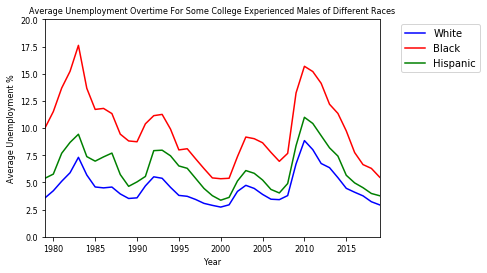

In [686]:
plt.plot(date, white_men_some_college_final, '-b', label='White')
plt.plot(date, black_men_some_college_final, '-r', label='Black')
plt.plot(date, hispanic_men_some_college_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Some College Experienced Males of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

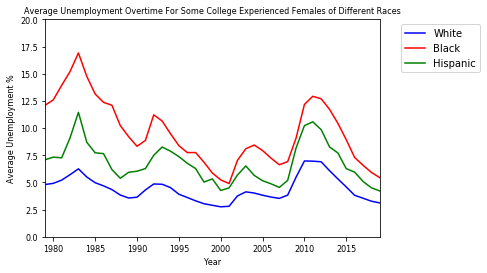

In [687]:
plt.plot(date, white_women_some_college_final, '-b', label='White')
plt.plot(date, black_women_some_college_final, '-r', label='Black')
plt.plot(date, hispanic_women_some_college_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Some College Experienced Females of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Gender on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Some College; Race Constant)

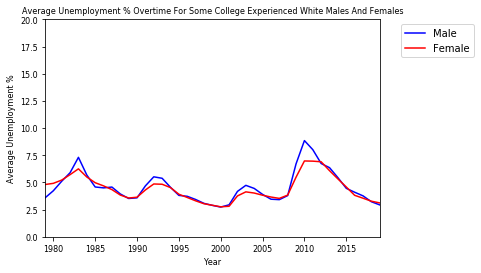

In [688]:
plt.plot(date, white_men_some_college_final, '-b', label='Male')
plt.plot(date, white_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Some College Experienced White Males And Females', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

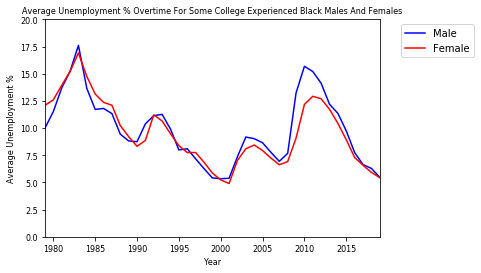

In [689]:
plt.plot(date, black_men_some_college_final, '-b', label='Male')
plt.plot(date, black_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Some College Experienced Black Males And Females', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

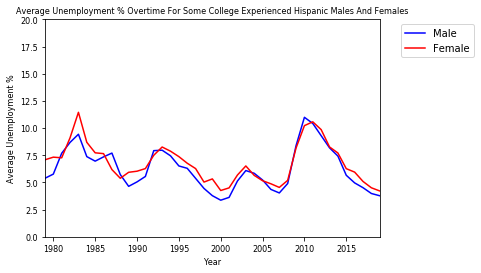

In [690]:
plt.plot(date, hispanic_men_some_college_final, '-b', label='Male')
plt.plot(date, hispanic_women_some_college_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Some College Experienced Hispanic Males And Females', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Race on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Bachelor's Degree; Gender Constant)

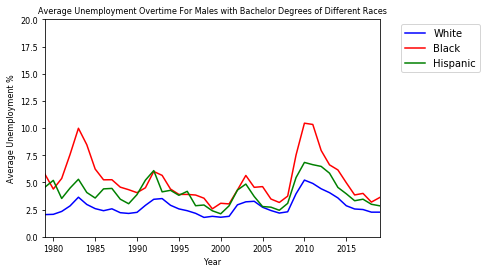

In [691]:
plt.plot(date, white_men_bachelors_degree_final, '-b', label='White')
plt.plot(date, black_men_bachelors_degree_final, '-r', label='Black')
plt.plot(date, hispanic_men_bachelors_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Males with Bachelor Degrees of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

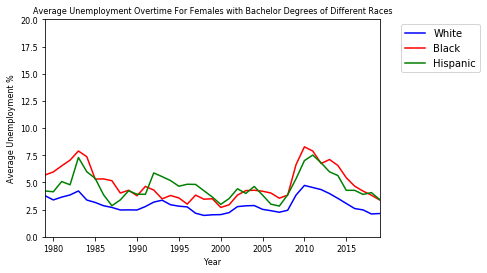

In [692]:
plt.plot(date, white_women_bachelors_degree_final, '-b', label='White')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Black')
plt.plot(date, hispanic_women_bachelors_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Females with Bachelor Degrees of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Gender on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Bachelor's Degree; Race Constant)

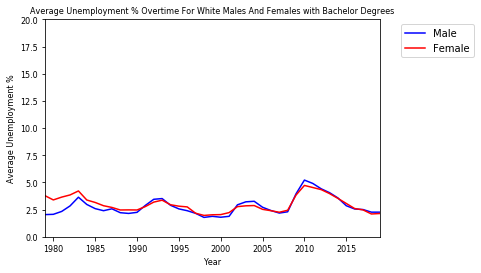

In [693]:
plt.plot(date, white_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, white_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For White Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

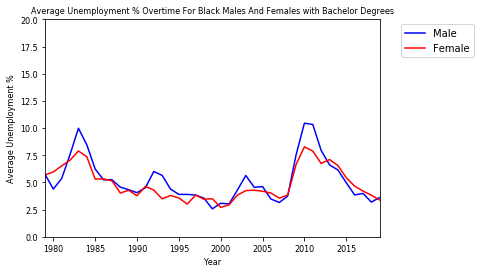

In [694]:
plt.plot(date, black_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Black Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

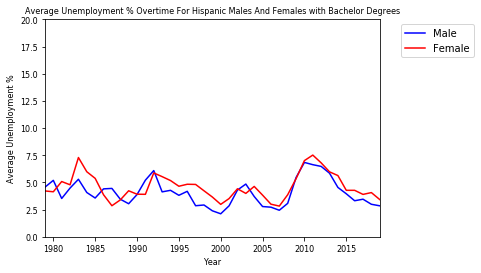

In [695]:
plt.plot(date, hispanic_men_bachelors_degree_final, '-b', label='Male')
plt.plot(date, hispanic_women_bachelors_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Hispanic Males And Females with Bachelor Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Race on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Advanced Degree; Gender Constant)

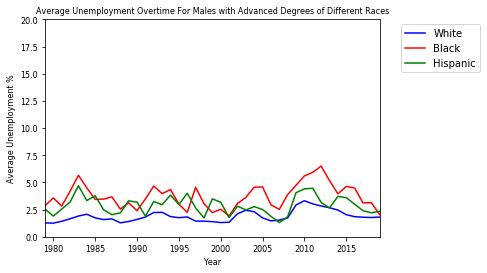

In [696]:
plt.plot(date, white_men_advanced_degree_final, '-b', label='White')
plt.plot(date, black_men_advanced_degree_final, '-r', label='Black')
plt.plot(date, hispanic_men_advanced_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Males with Advanced Degrees of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

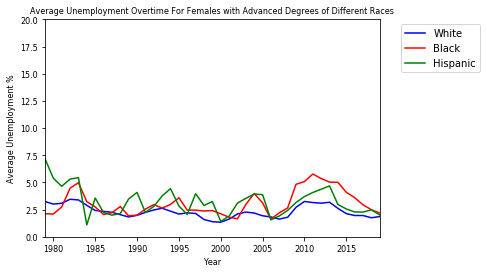

In [697]:
plt.plot(date, white_women_advanced_degree_final, '-b', label='White')
plt.plot(date, black_women_advanced_degree_final, '-r', label='Black')
plt.plot(date, hispanic_women_advanced_degree_final, '-g', label='Hispanic')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment Overtime For Females with Advanced Degrees of Different Races', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Plotting - Effect of Gender on Average Unemployment Rate Overtime, 1979-2019 (Education Level Constant - Advanced Degree; Race Constant)

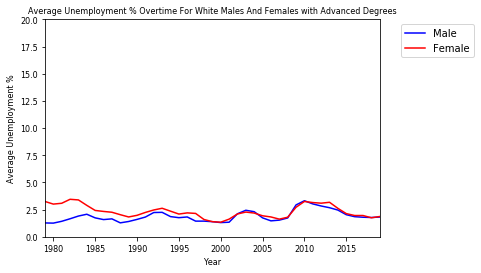

In [698]:
plt.plot(date, white_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, white_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For White Males And Females with Advanced Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

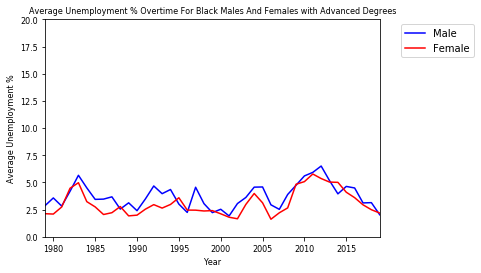

In [699]:
plt.plot(date, black_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, black_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Black Males And Females with Advanced Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

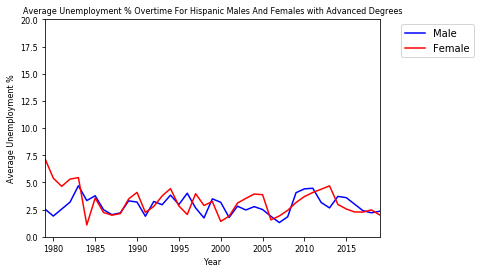

In [700]:
plt.plot(date, hispanic_men_advanced_degree_final, '-b', label='Male')
plt.plot(date, hispanic_women_advanced_degree_final, '-r', label='Female')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Hispanic Males And Females with Advanced Degrees', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Predictive Modelling

Using a linear regression, the relationship between time and annual average unemployment for individuals with advanced degrees, same race, but of different genders was modelled. This type of relationship was modelled specifically because the data overall seemed relatively smooth and followed relatively linear trends. Although adding a predictor (year) or using a time series regression (ARIMA) would have portrayed the relationship more accurately, given the scope of the class, a linear regression model was chosen.

In [701]:
#converting lists into arrays and reshaping them
date_array = np.asarray(date_float)
date_array=date_array.reshape(-1,1)

white_men_advanced_degree_final_array=np.asarray(white_men_advanced_degree_final)
white_men_advanced_degree_final_array = white_men_advanced_degree_final_array.reshape(-1,1)

white_women_advanced_degree_final_array=np.asarray(white_women_advanced_degree_final)
white_women_advanced_degree_final_array = white_women_advanced_degree_final_array.reshape(-1,1)

black_men_advanced_degree_final_array=np.asarray(black_men_advanced_degree_final)
black_men_advanced_degree_final_array = black_men_advanced_degree_final_array.reshape(-1,1)

black_women_advanced_degree_final_array=np.asarray(black_women_advanced_degree_final)
black_women_advanced_degree_final_array = black_women_advanced_degree_final_array.reshape(-1,1)

hispanic_men_advanced_degree_final_array=np.asarray(hispanic_men_advanced_degree_final)
hispanic_men_advanced_degree_final_array = hispanic_men_advanced_degree_final_array.reshape(-1,1)

hispanic_women_advanced_degree_final_array=np.asarray(hispanic_women_advanced_degree_final)
hispanic_women_advanced_degree_final_array = hispanic_women_advanced_degree_final_array.reshape(-1,1)

In [702]:
#training/testing data (80% of data in training and 20% of the data in testing)
#random state value was randomly chosen, but kept consistent

x_train1, x_test1, y_train1, y_test1 = train_test_split(date_array, white_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train2, x_test2, y_train2, y_test2 = train_test_split(date_array, white_women_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train3, x_test3, y_train3, y_test3 = train_test_split(date_array, black_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train4, x_test4, y_train4, y_test4 = train_test_split(date_array, black_women_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train5, x_test5, y_train5, y_test5 = train_test_split(date_array, hispanic_men_advanced_degree_final_array, test_size=0.2, random_state=44)
x_train6, x_test6, y_train6, y_test6 = train_test_split(date_array, hispanic_women_advanced_degree_final_array, test_size=0.2, random_state=44)

In [703]:
#Linear regression, training model using the training sets
white_men_advanced_degree_final_reg = LinearRegression().fit(x_train1,y_train1)
white_women_advanced_degree_final_reg = LinearRegression().fit(x_train2,y_train2)
black_men_advanced_degree_final_reg = LinearRegression().fit(x_train3,y_train3)
black_women_advanced_degree_final_reg = LinearRegression().fit(x_train4,y_train4)
hispanic_men_advanced_degree_final_reg = LinearRegression().fit(x_train5,y_train5)
hispanic_women_advanced_degree_final_reg = LinearRegression().fit(x_train6,y_train6)

In [704]:
#Predicting model using testing set
y_pred1 = white_men_advanced_degree_final_reg.predict(x_test1)
y_pred2 = white_women_advanced_degree_final_reg.predict(x_test2)
y_pred3 = black_men_advanced_degree_final_reg.predict(x_test3)
y_pred4 = black_women_advanced_degree_final_reg.predict(x_test4)
y_pred5 = hispanic_men_advanced_degree_final_reg.predict(x_test5)
y_pred6 = hispanic_women_advanced_degree_final_reg.predict(x_test6)

Slope: 
 [[0.02194472]]
Y-intercept: 
 [-41.9800549]
Coefficient of determination: 0.06
Slope: 
 [[-0.01241705]]
Y-intercept: 
 [27.17326571]
Coefficient of determination: 0.14


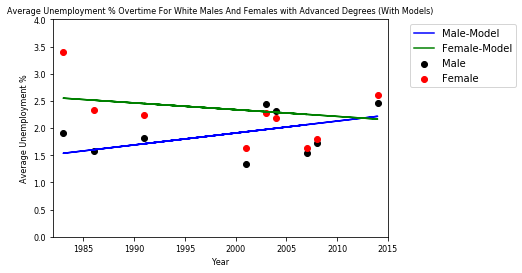

In [705]:
#White Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#White Male with Advanced Degree
print('Slope: \n', white_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', white_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_pred1)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#White Female with Advanced Degree
print('Slope: \n', white_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', white_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test2, y_pred2)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test1, y_test1,  color='black',label='Male') #plots raw data
plt.plot(x_test1, y_pred1, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test2, y_test2,  color='red',label='Female') #plots raw data
plt.plot(x_test2, y_pred2, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(0,4) #specifies min and max values on y-axis

plt.title('Average Unemployment % Overtime For White Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Average Unemployment %', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Slope: 
 [[0.02668093]]
Y-intercept: 
 [-49.59007072]
Coefficient of determination: -0.25
Slope: 
 [[0.03526989]]
Y-intercept: 
 [-67.4325382]
Coefficient of determination: -0.05


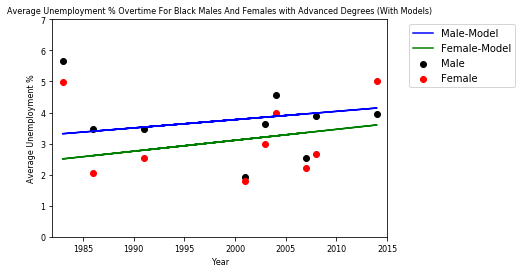

In [706]:
#Black Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#Black Male with Advanced Degree
print('Slope: \n', black_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', black_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test3, y_pred3)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#Black Female with Advanced Degree
print('Slope: \n', black_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', black_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test4, y_pred4)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test3, y_test3,  color='black',label='Male') #plots raw data
plt.plot(x_test3, y_pred3, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test4, y_test4,  color='red',label='Female') #plots raw data
plt.plot(x_test4, y_pred4, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(0,7) #specifies min and max values on y-axis

plt.title('Average Unemployment % Overtime For Black Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Average Unemployment %', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Slope: 
 [[0.00584566]]
Y-intercept: 
 [-8.6960906]
Coefficient of determination: -0.23
Slope: 
 [[-0.03755559]]
Y-intercept: 
 [78.39131392]
Coefficient of determination: 0.01


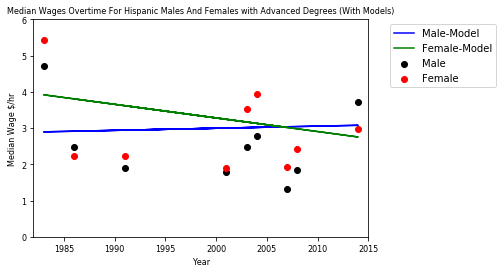

In [707]:
#Hispanic Male and Females with Advanced Degree Outcomes (includes slope, y-intercept of model as well as R^2)
#Plot with model fit is also included

#Hispanic Male with Advanced Degree
print('Slope: \n', hispanic_men_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', hispanic_men_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test5, y_pred5)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

#Hispanic Female with Advanced Degree
print('Slope: \n', hispanic_women_advanced_degree_final_reg.coef_) #slope
print('Y-intercept: \n', hispanic_women_advanced_degree_final_reg.intercept_) #y-intercept
print('Coefficient of determination: %.2f'
      % r2_score(y_test6, y_pred6)) #Coefficient of determination (R^2), indicates goodness of fit for linear model (1=perfect) 

plt.scatter(x_test5, y_test5,  color='black',label='Male') #plots raw data
plt.plot(x_test5, y_pred5, '-b', label='Male-Model') #plots linear fit 

plt.scatter(x_test6, y_test6,  color='red',label='Female') #plots raw data
plt.plot(x_test6, y_pred6, '-g', label='Female-Model')#plots linear fit 

plt.xlim(1982,2015) #specifies min and max values on x-axis
plt.ylim(0,6) #specifies min and max values on y-axis

plt.title('Median Wages Overtime For Hispanic Males And Females with Advanced Degrees (With Models)', size=8) #titles figure and specifies font size
plt.ylabel('Median Wage $/hr', size=8) #labels y-axis and specifies font size
plt.xlabel('Year', size=8) #labels x-axis and specifies font size

plt.xticks(fontsize=8) #specifies font size of values on x-axis
plt.yticks(fontsize=8) #specifies font size of values on y-axis
plt.legend() #adds legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #positions legend to outside the figure, upper left corner

Plotting - Effect of Education Level on Median Wage Overtime, 1979-2019 (Race Constant; Gender Constant) 

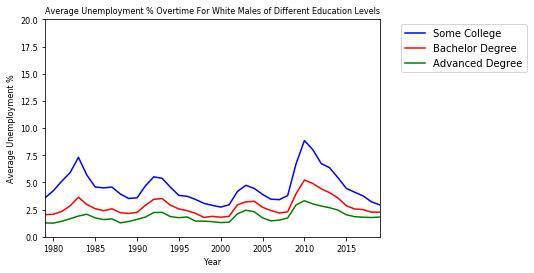

In [708]:
plt.plot(date, white_men_some_college_final, '-b', label='Some College')
plt.plot(date, white_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, white_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For White Males of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

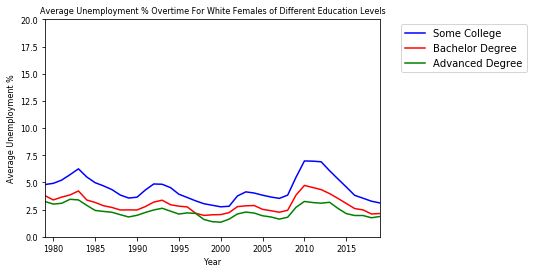

In [709]:
plt.plot(date, white_women_some_college_final, '-b', label='Some College')
plt.plot(date, white_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, white_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For White Females of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

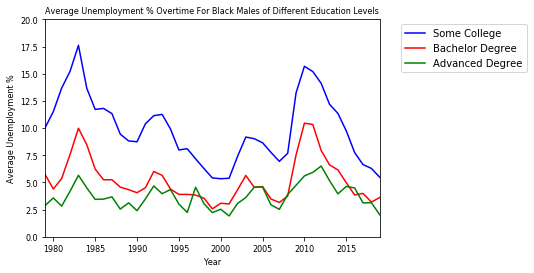

In [710]:
plt.plot(date, black_men_some_college_final, '-b', label='Some College')
plt.plot(date, black_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, black_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Black Males of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

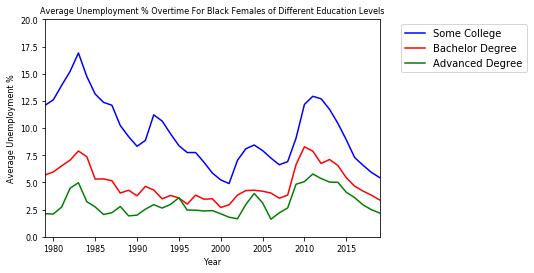

In [711]:
plt.plot(date, black_women_some_college_final, '-b', label='Some College')
plt.plot(date, black_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, black_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Black Females of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

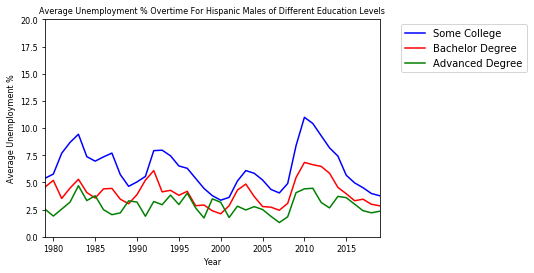

In [712]:
plt.plot(date, hispanic_men_some_college_final, '-b', label='Some College')
plt.plot(date, hispanic_men_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, hispanic_men_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Hispanic Males of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

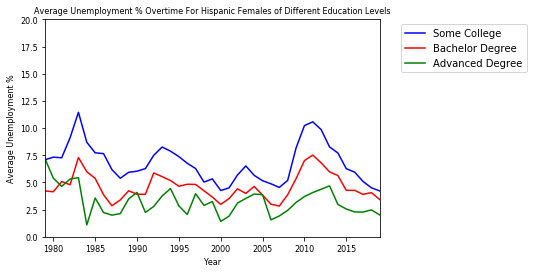

In [713]:
plt.plot(date, hispanic_women_some_college_final, '-b', label='Some College')
plt.plot(date, hispanic_women_bachelors_degree_final, '-r', label='Bachelor Degree')
plt.plot(date, hispanic_women_advanced_degree_final, '-g', label='Advanced Degree')
plt.xlim(1979,2019)
plt.ylim(0,20)
plt.title('Average Unemployment % Overtime For Hispanic Females of Different Education Levels', size=8)
plt.ylabel('Average Unemployment %', size=8)
plt.xlabel('Year', size=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')